In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [11]:
data = pd.read_csv('data/Caravan.csv').drop(columns='Unnamed: 0')
data

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,36,1,1,2,8,0,6,1,2,1,...,0,0,0,1,0,0,0,0,0,No
5818,35,1,4,4,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
5819,33,1,3,4,8,0,6,0,3,5,...,0,0,0,1,0,0,0,0,0,Yes
5820,34,1,3,2,8,0,7,0,2,7,...,0,0,0,0,0,0,0,0,0,No


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 86 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   MOSTYPE   5822 non-null   int64 
 1   MAANTHUI  5822 non-null   int64 
 2   MGEMOMV   5822 non-null   int64 
 3   MGEMLEEF  5822 non-null   int64 
 4   MOSHOOFD  5822 non-null   int64 
 5   MGODRK    5822 non-null   int64 
 6   MGODPR    5822 non-null   int64 
 7   MGODOV    5822 non-null   int64 
 8   MGODGE    5822 non-null   int64 
 9   MRELGE    5822 non-null   int64 
 10  MRELSA    5822 non-null   int64 
 11  MRELOV    5822 non-null   int64 
 12  MFALLEEN  5822 non-null   int64 
 13  MFGEKIND  5822 non-null   int64 
 14  MFWEKIND  5822 non-null   int64 
 15  MOPLHOOG  5822 non-null   int64 
 16  MOPLMIDD  5822 non-null   int64 
 17  MOPLLAAG  5822 non-null   int64 
 18  MBERHOOG  5822 non-null   int64 
 19  MBERZELF  5822 non-null   int64 
 20  MBERBOER  5822 non-null   int64 
 21  MBERMIDD  5822

In [27]:
# Standardise data
scaler = StandardScaler()
x = data[['MOSTYPE', 'MOSHOOFD']]
# x = data.drop(columns='Purchase', axis=1)
scaler.fit(x)

StandardScaler()

In [28]:
scaled_x = pd.DataFrame(scaler.transform(x), columns=x.columns)
scaled_x.head()

,MOSTYPE,MOSHOOFD
0,0.680906,0.779405
1,0.992297,0.779405
2,0.992297,0.779405
3,-1.187437,-0.970980
4,1.225840,1.479559


In [30]:
X_train, X_test, y_train, y_test = train_test_split(scaled_x, data['Purchase'], test_size=1000, shuffle=False)
knn_1 = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
knn_1_pred = knn_1.predict(X_test)
print('Accuracy rate: %.2f' %(np.mean(knn_1_pred==y_test)*100) + '%')
print('Error rate: %.2f' %((1 - np.mean(knn_1_pred==y_test))*100) + '%')

Accuracy rate: 93.30%
Error rate: 6.70%


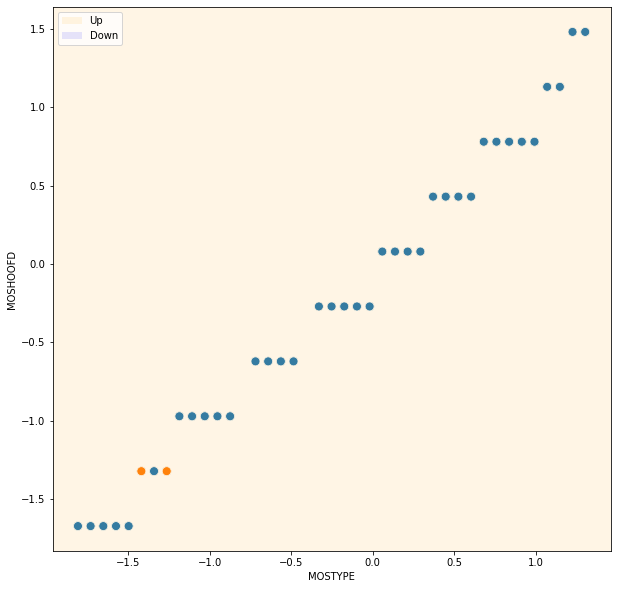

In [32]:
# Scatter plot
plt.figure(figsize=(10,10))
sb.scatterplot(data=X_test, x='MOSTYPE', y='MOSHOOFD', hue=y_test, s=80)
# Prepare X, Y, Z for grid plot
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
X = np.linspace(x_min, x_max, 300)
Y = np.linspace(y_min, y_max, 300)
X, Y = np.meshgrid(X, Y)
Z_pred = knn_1.predict(np.c_[X.ravel(), Y.ravel()])
Z = np.array([1 if x == 'Down' else 0 for x in Z_pred]).reshape(X.shape)
# Create KNN Boundary & area color
plt.contour(X, Y, Z, linewidth=0.3, colors='k')
cs = plt.contourf(X, Y, Z, 2, alpha=0.1, colors=('orange', 'blue'))
color, lb = cs.legend_elements()
plt.legend(color, ['Up','Down'])
plt.show()

In [35]:
# Use PCA to reduce demention before use KNN
x = data.drop(columns='Purchase', axis=1)
pca = PCA().fit(x)
k = pd.DataFrame({'Dimension': np.arange(1,pca.n_components_ + 1),'Cum ratio': np.cumsum(pca.explained_variance_ratio_)})
k

,Dimension,Cum ratio
0,1,0.592209
1,2,0.688756
2,3,0.728534
3,4,0.758037
4,5,0.785915
...,...,...
80,81,0.999996
81,82,0.999998
82,83,0.999999
83,84,1.000000


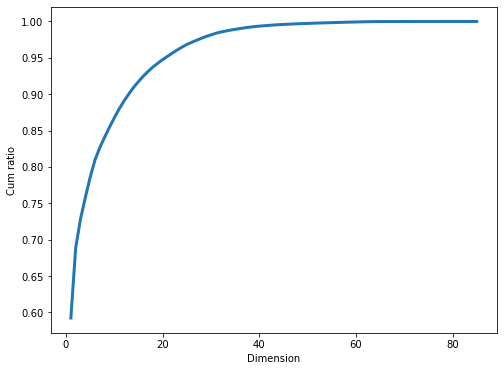

In [36]:
plt.figure(figsize=(8,6))
sb.lineplot(data=k, x='Dimension', y='Cum ratio', linewidth=3)
plt.show()

In [37]:
# Tiến hành PCA với k = 2
pca = PCA(2)
# Bộ dữ liệu được transform theo 2 chiều dữ liệu mới
P = pca.fit_transform(x)
df = pd.DataFrame(P, columns=['Component 1', 'Component 2'])
df.head()

,Component 1,Component 2
0,-9.232688,-5.129584
1,-12.130553,-4.927992
2,-13.308732,4.627789
3,15.696613,2.136797
4,-13.918648,-8.357374


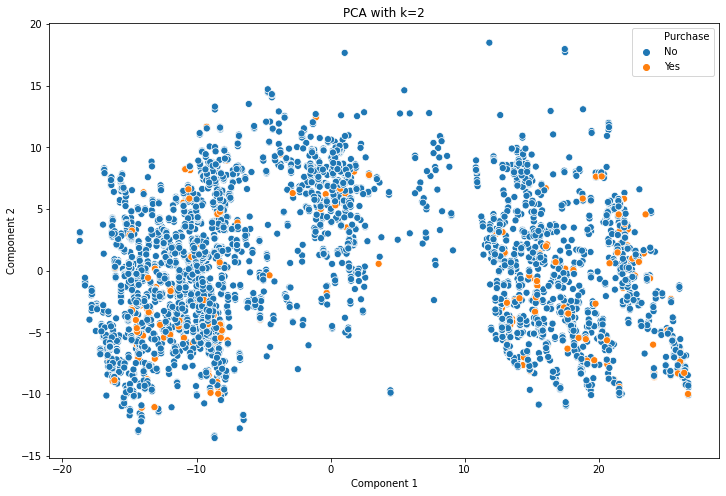

In [39]:
# Trực quan hoá dữ liệu theo 2 chiều
plt.figure(figsize=(12,8))
sb.scatterplot(data=df, x='Component 1', y='Component 2', hue=data['Purchase'], s=50)
plt.title('PCA with k=2')
plt.show()

In [48]:
X_train, X_test, y_train, y_test = train_test_split(df, data['Purchase'], test_size=1000, shuffle=False)
knn_1 = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
knn_1_pred = knn_1.predict(X_test)
print('Accuracy rate: %.2f' %(np.mean(knn_1_pred==y_test)*100) + '%')
print('Error rate: %.2f' %((1 - np.mean(knn_1_pred==y_test))*100) + '%')

Accuracy rate: 92.80%
Error rate: 7.20%


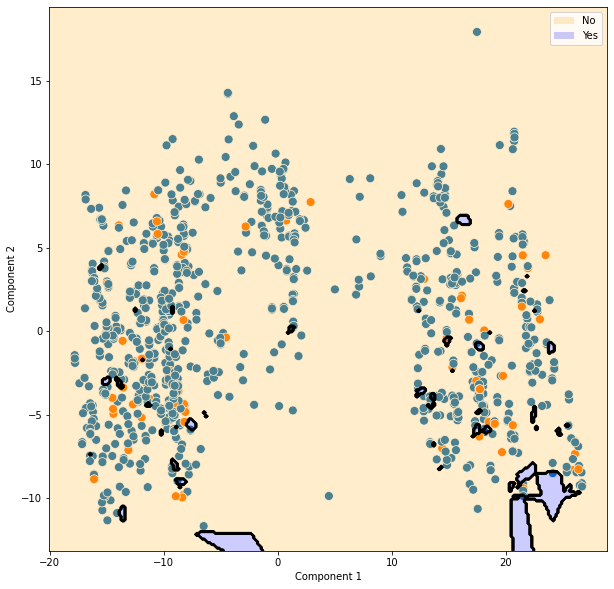

In [52]:
# Scatter plot
plt.figure(figsize=(10,10))
sb.scatterplot(data=X_test, x='Component 1', y='Component 2', hue=y_test, s=80)
# Prepare X, Y, Z for grid plot
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
X = np.linspace(x_min, x_max, 300)
Y = np.linspace(y_min, y_max, 300)
X, Y = np.meshgrid(X, Y)
Z_pred = knn_1.predict(np.c_[X.ravel(), Y.ravel()])
Z = np.array([1 if x == 'Yes' else 0 for x in Z_pred]).reshape(X.shape)
# Create KNN Boundary & area color
plt.contour(X, Y, Z, linewidth=0.3, colors='k')
cs = plt.contourf(X, Y, Z, 1, alpha=0.2, colors=('orange', 'blue'))
color, lb = cs.legend_elements()
plt.legend(color, ['No','Yes'])
plt.show()

In [53]:
# Both PCA + KNN and KNN alone not work 